### load python modules

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

import h5py

from madminer.ml import ParameterizedRatioEstimator


### load input files for both models to evaluate

In [2]:
n_events = 300
top_width = 1.5
x = np.load('/home/zbhatti/codebase/madminer/momemta/inputs/x_test.npy')[:n_events,:]
n_observables = x.shape[1]
# theta0 = np.vstack( (np.linspace(benchmarks[0], benchmarks[-1], n_benchmarks), top_width*np.ones(n_benchmarks)) ).T
# print theta0.shape, x.shape, log_ratios_T.shape
mass_width_grid = np.load('/home/zbhatti/codebase/madminer/momemta/inputs/mass_width_grid_0.npy')
miner_setup = h5py.File('/home/zbhatti/codebase/madminer/momemta/inputs/miner_setup.h5')
benchmarks = miner_setup['benchmarks']['values'][:-7][:,0]
n_benchmarks = benchmarks.shape[0]
theta0 = np.vstack( (np.linspace(benchmarks[0], benchmarks[-1], n_benchmarks), top_width*np.ones(n_benchmarks)) ).T

print x[0]
print mass_width_grid[:, 0]
print benchmarks

[ 1.96824310e+02  1.76990402e+02 -4.68452007e-01 -1.24286556e+00
  1.82984085e+02  1.54625702e+02  5.96129179e-01  2.64015341e+00
  3.48355255e+01  3.45777702e+01 -1.22025542e-01  2.27328801e+00
  4.20999870e+01  4.10957832e+01  2.20621169e-01  2.39409104e-01
  8.35535202e+01  7.52337754e-01  9.75870590e+01  1.11157265e+02
  9.43672943e+01  1.07923241e+02  1.28018890e+02]
[160.         160.50980392 161.01960784 161.52941176 162.03921569
 162.54901961 163.05882353 163.56862745 164.07843137 164.58823529
 165.09803922 165.60784314 166.11764706 166.62745098 167.1372549
 167.64705882 168.15686275 168.66666667 169.17647059 169.68627451
 170.19607843 170.70588235 171.21568627 171.7254902  172.23529412
 172.74509804 173.25490196 173.76470588 174.2745098  174.78431373
 175.29411765 175.80392157 176.31372549 176.82352941 177.33333333
 177.84313725 178.35294118 178.8627451  179.37254902 179.88235294
 180.39215686 180.90196078 181.41176471 181.92156863 182.43137255
 182.94117647 183.45098039 183.9

### evaluate 1st model

Text(0.5,1,'Madminer Log Likelihood Ratio on 300 Events')

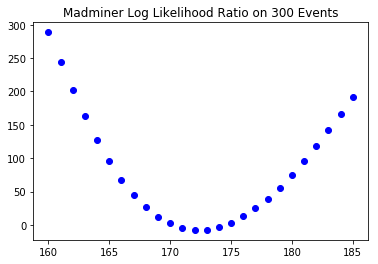

In [3]:
forge1 = ParameterizedRatioEstimator(n_hidden=(100, 100))
forge1.load('/home/zbhatti/codebase/madminer/momemta/inputs/alice_hpc_6/alice')
log_ratios_T_1, _0 = forge1.evaluate_log_likelihood_ratio(x=x, theta=theta0, test_all_combinations=True, run_on_gpu=False)
madminer_log_ratios_1 = log_ratios_T_1.T
madminer_log_sq_ratios_1 = -2*madminer_log_ratios_1
madminer_sum_log_sq_ratios_1 = np.sum(madminer_log_sq_ratios_1, axis=0)
plt.plot(benchmarks, madminer_sum_log_sq_ratios_1, 'o', color='blue')
plt.title('Madminer Log Likelihood Ratio on {} Events'.format(n_events))

### evaluate 2nd model

Text(0.5,1,'Madminer Log Likelihood Ratio on 300 Events')

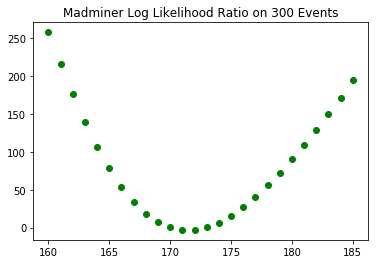

In [4]:
forge2 = ParameterizedRatioEstimator(n_hidden=(100, 100))
forge2.load('/home/zbhatti/codebase/madminer/momemta/inputs/alice_hpc_6_dup/alice')
log_ratios_T_2, _0 = forge2.evaluate_log_likelihood_ratio(x=x, theta=theta0, test_all_combinations=True, run_on_gpu=False)
madminer_log_ratios_2 = log_ratios_T_2.T
madminer_log_sq_ratios_2 = -2*madminer_log_ratios_2
madminer_sum_log_sq_ratios_2 = np.sum(madminer_log_sq_ratios_2, axis=0)
plt.plot(benchmarks, madminer_sum_log_sq_ratios_2, 'o', color='green')
plt.title('Madminer Log Likelihood Ratio on {} Events'.format(n_events))


### Compare both models in aggregate

/home/zbhatti/.conda/envs/mm_vs_mem/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


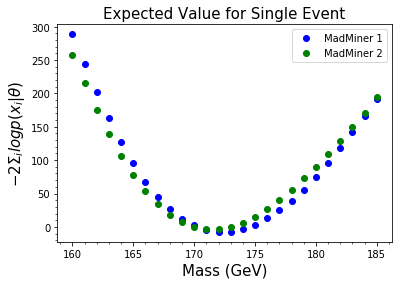

In [5]:
plt.plot(benchmarks, madminer_sum_log_sq_ratios_1, 'o', color='blue', label='MadMiner 1')
plt.plot(benchmarks, madminer_sum_log_sq_ratios_2, 'o', color='green', label='MadMiner 2')
plt.legend()
plt.xlabel('Mass (GeV)', fontsize=15)
# plt.ylabel(r'Sum of Log Squared Likelihood Ratios')
plt.ylabel(r'$-2\Sigma_i logp(x_i|\theta)$', fontsize=15)
plt.title('Expected Value for Single Event', fontsize=15)
plt.axes().yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.axes().xaxis.set_minor_locator(tck.AutoMinorLocator())
plt.show()

### Compare both models event by event

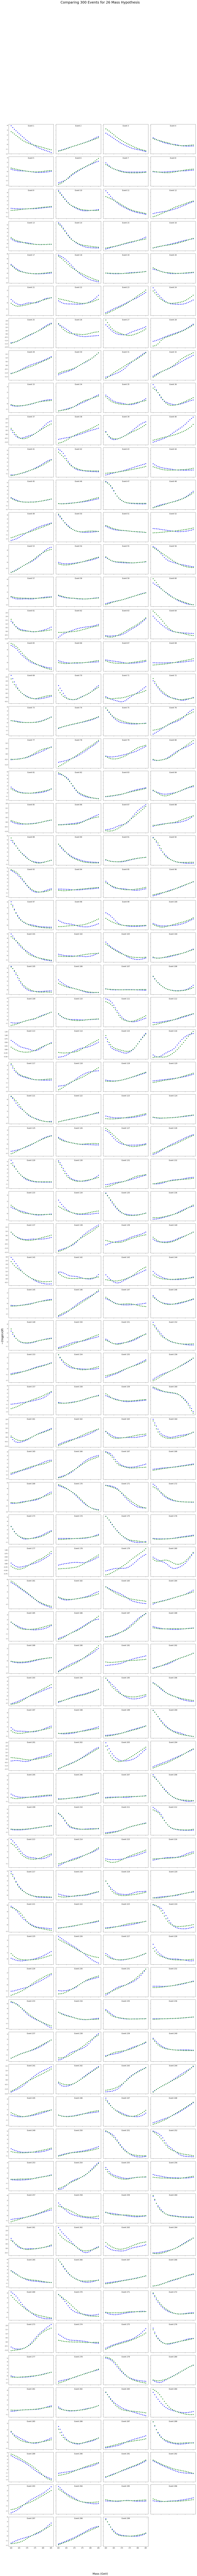

In [6]:
m, n = n_events/4, 4
fig, ax = plt.subplots(m, n, sharex='col', sharey='row')
fig.set_size_inches(20,250)
for i in range(0, m*n):
    x, y = i // n, i % n
    ax[x][y].scatter(benchmarks, madminer_log_sq_ratios_1[i], marker='o', color='blue', s=25)
    ax[x][y].scatter(benchmarks, madminer_log_sq_ratios_2[i], marker='o', color='green', s=25)
    ax[x][y].set_title('Event {}'.format(i + 1),pad=-15)

fig.delaxes(ax[-1][-1])
fig.text(0.5, -0.01, 'Mass (GeV)', ha='center', fontsize=20)
fig.text(-0.01, 0.5, r'$-2logp(x|\theta)$', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1.05, 'Comparing {} Events for {} Mass Hypothesis'.format(n_events, n_benchmarks), ha='center', va='top', fontsize=25)
plt.legend()
plt.tight_layout()
plt.show()